In [7]:
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
# Data Load & Time Normalisation (Revised)
# Cleanly load FFT features, normalize timestamps, and prepare a stable time index
# Load FFT features with anomaly labels
df = pd.read_csv("../fft_features_with_anomalies.csv")

# Normalize timestamp format: HH:MM:SS:ms → HH:MM:SS.ms
for col in ["window_start", "window_end"]:
    df[col] = (
        df[col]
        .astype(str)
        .str.replace(r":(\d{3})$", r".\1", regex=True)
    )

# Parse timestamps safely
df["window_start"] = pd.to_datetime(
    df["window_start"], format="%H:%M:%S.%f", errors="coerce"
)
df["window_end"] = pd.to_datetime(
    df["window_end"], format="%H:%M:%S.%f", errors="coerce"
)

# Drop rows with invalid timestamps
df = df.dropna(subset=["window_start"])

# Sort for clean plotting
df = df.sort_values("window_start").reset_index(drop=True)

print(f"Loaded {len(df)} FFT windows")


Loaded 85358 FFT windows


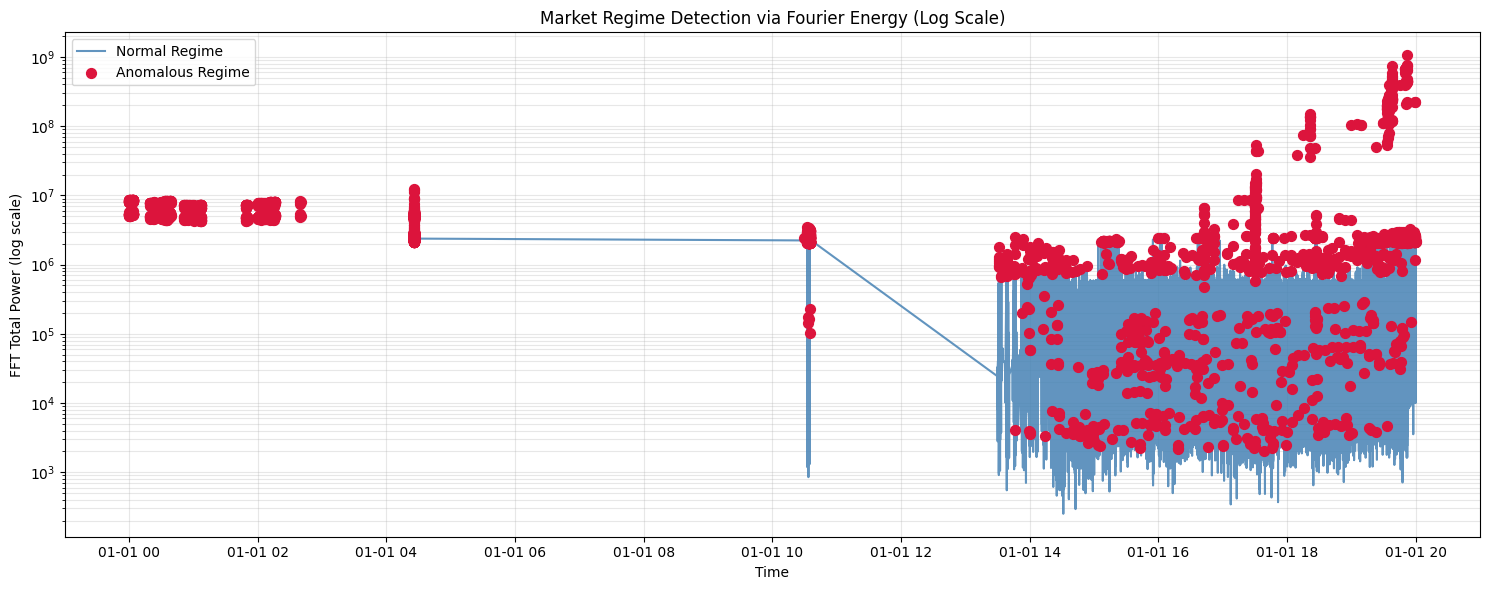

In [10]:
# FFT Power Spectrum Anomaly Visualization
# Visualise frequency-domain energy over time and highlight anomalous regimes.
# Split normal vs anomalous windows
# Log scaling fpr volatility / power spectra, makes all regimes readable, preserves anomaly extremeness

normal = df[df["anomaly"] == 1]
anomalies = df[df["anomaly"] == -1]

plt.figure(figsize=(15, 6))

plt.plot(
    normal["window_start"],
    normal["total_power"],
    label="Normal Regime",
    color="steelblue",
    alpha=0.85
)

plt.scatter(
    anomalies["window_start"],
    anomalies["total_power"],
    label="Anomalous Regime",
    color="crimson",
    s=50,
    zorder=3
)

plt.yscale("log")  # ⭐ Key change

plt.xlabel("Time")
plt.ylabel("FFT Total Power (log scale)")
plt.title("Market Regime Detection via Fourier Energy (Log Scale)")
plt.legend()
plt.grid(alpha=0.3, which="both")
plt.tight_layout()
plt.show()